## The Classical Iris Dataset
This is probably the most familiar dataset to many who are interested in the data analytics. It is one of the simplest dataset to learn and test classification techniques. <br><br> For those who are interested in doing by themselves, the dataset could be found here: https://archive.ics.uci.edu/ml/datasets/Iris

Let's take a look at the data description first before jumping into the coding.
#### Description of the dataset
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

- Number of Instances: 150 (50 in each of three classes)
- Number of Attributes: 4 numeric, predictive attributes and the class
- Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: <br>
         -- Iris Setosa <br>
         -- Iris Versicolour <br>
         -- Iris Virginica <br>


- Missing Attribute Values: None


### The Objective
We are tasked to come up with a model that accurately classifies the iris flowers of three related species. 

In [19]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv("Iris.csv", sep = ',')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In the data description, it is explicitly said that the dataset does not contain any missing values. Let's verify by ourselves. 

In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

It indeed does not have any null values in the dataset! This is one way to check the 'missingness' of the dataset. However, when the dataset is huge, it's going to take a while to compute using this method. Hence, when dealing with larget dataset, one is recommended to take a different approach (yet there are many ways, I found this method interesting, https://github.com/ResidentMario/missingno). <br><br> Now we have confirmed that the data is clean, let's conduct some explanatory data analysis to understand how each variable works or interacts with each other. 

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [6]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
data.drop('Id', axis = 1, inplace = True)

Looking at the summary statistic of each variable, we expect the variable ```Id``` to be integer, the rest of the predictors to be float variables, and our response variable ```Species``` to be an object (String) variable. We can confirm that all the variables are stored as expected data type. <br><br> However, this summary statistic table does not tell us much about the dataset. Let's visualize it to get better insights about the data. <br><br> We already have index so we don't really need ```Id``` which is another indicator variable. Hence, we will drop ```Id```. 

### Visualization
First, let's examine the relationships between variables in pair-wise fashion.

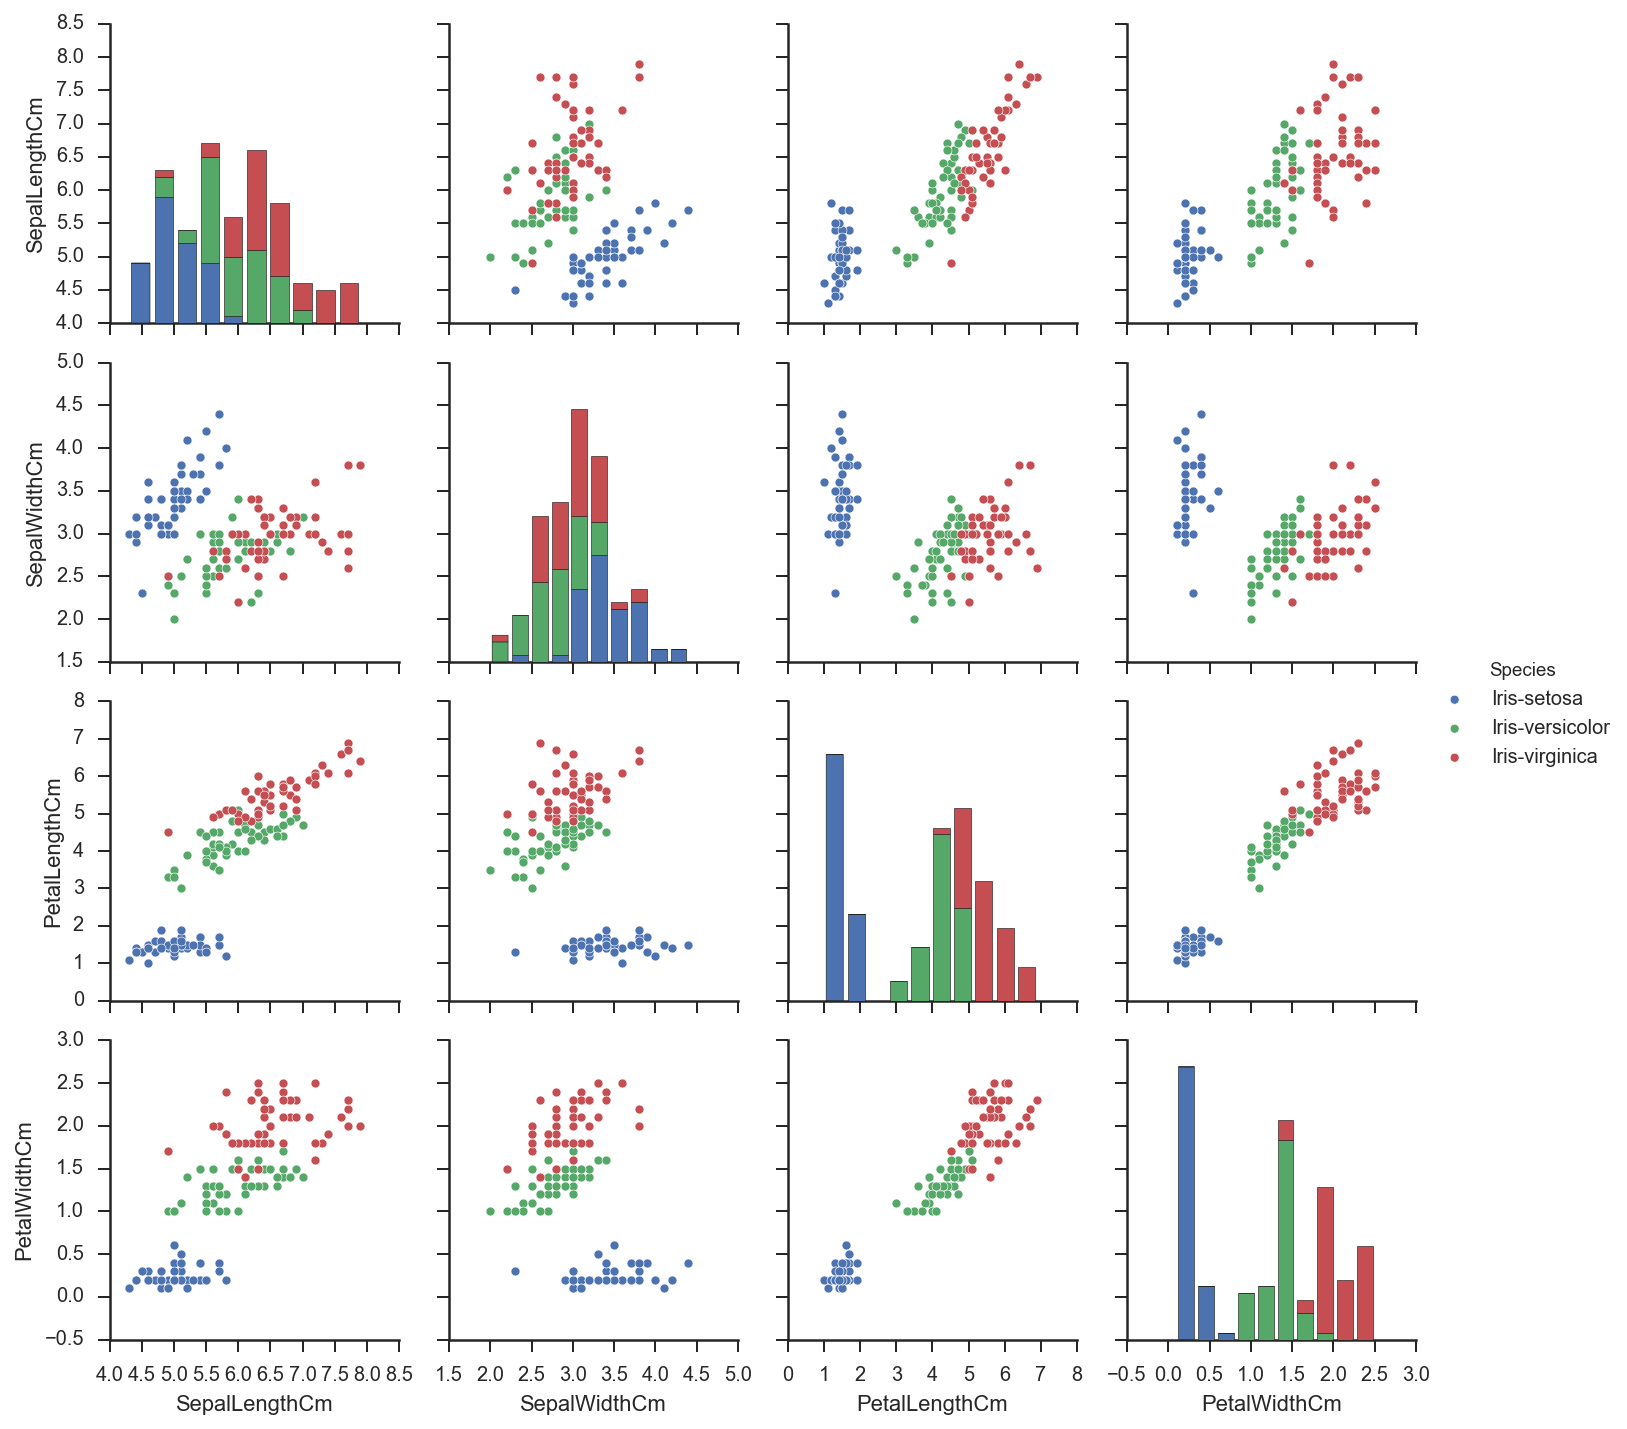

In [8]:
sns.pairplot(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']], hue = 'Species')

#### What can we learn from the pairwise plot?
- We have three different species as expected.
- The measurement overlap is notable for sepal length and width. However, setosa seems to be linearly separable.
- There are clear pattern in petal length and width by different species (might be more important variables in distinguishing the species). 
- There seems to be some outliers for some variables but not too sure yet.
- Sepal length and width are normally distributed and petal length and width are bimodally distributed.

Now Let's look into each variable one by one.

/Users/troylee/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


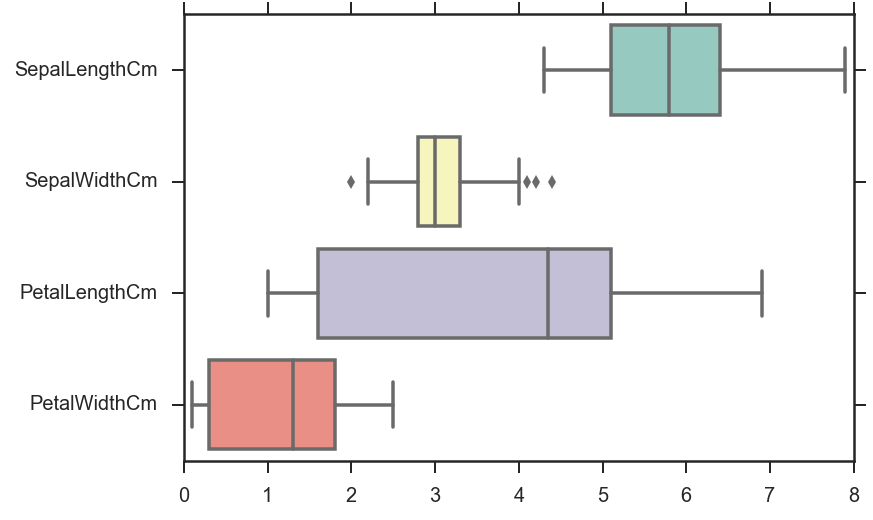

In [9]:
sns.boxplot(data=data, orient="h", palette="Set3")

Boxplot is is one way of displaying distribution. We can see there are some outliers in variable ```SepalWidthCm```. Since ```SepalWidthCm``` is approximately normally distributed as we can see in the pairplot, appriximately 95~96% of the data should be within two standard deviations from the mean. We will examine how far away those outliers are located by using normal approximation. <br><br> But before we drop the outliers, we need to think about what is causing this extremeness. Is it due to measurement error or merely data entry mistake? In this example, we will assume it is a measurement error and be little more generous about dropping them. We will eliminate the observation if sepal width is 2.5 standard deviations away from the mean. 

In [10]:
data[data['SepalWidthCm'] > data['SepalWidthCm'].mean() + 2.5 * data['SepalWidthCm'].std()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [11]:
data[data['SepalWidthCm'] < data['SepalWidthCm'].mean() - 2.5 * data['SepalWidthCm'].std()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


There are two extreme values in sepal width for Setosa. We will drop these two values.

In [12]:
data.drop([15,33], axis = 0, inplace = True)

In [13]:
data.shape

(148, 5)

After dropping the outliers, we have 148 observation. Checked. <br><br> There were not much we could do in a feature engineering step since we worked with a very simple and already clean dataset in the first place. So now, our dataset is ready for modeling!

### Modeling
We will first divide the dataset into training and test group in 3:1 ratio (1/4 of the dataset is assigned as test group). Then we will train the logistic regression model and evaluate its performance based on accuracy. We should note that one may expect the model performance to be poor since versicolor and virginica were not linearly separable when looking at the plot of the two variables; sepal length and width. Let's see how it does!

In [14]:
from sklearn.cross_validation import train_test_split

X, y = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

/Users/troylee/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Logistic Regression (also known as the logit model)
Although the logistic regression require weaker assumptions than linear regression or general linear models, there are some assumptions to be satisfied in order for the model to be valid.
- Response variable should be categorical.
- Observations need to be independent.
- There should be little or no multicolinearity among predictors.
- Large sample sizes.

In [15]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
logitModel = LogisticRegression()
logitModel.fit(X_train, y_train)

# Prediction
y_pred = logitModel.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logitModel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


We achieved 97% accuracy without doing much. Well, we need to interpret this result with caution because our model might be overfitting the dataset. When different samples were assigned to training and testing group during the spliting procedure, we may get some different accuracy score. Hence, we will conduct k-fold cross validation. <br><br>
Cross Validation is a model validation technique used to assess the predictive performance of the model and evaluate how well the model performs outside the sample to a new data set. Among different types of cross validation methods(e.g. LOOCV, k-fold cross validation etc.), we will use 5 fold cross validation to validate the result of our model. 

> [Note] k-Fold Cross Validation: <br>
Split the original data set into k subsets, use one of the subsets as the testing set, and the rest of the subsets are used as the training set. This process is then repeated k times such that each subset is used as the testing set exactly once.

In [16]:
from sklearn.model_selection import cross_val_score

modelCV = LogisticRegression()
fiveFold_result = cross_val_score(modelCV, X, y, cv = 5, scoring = 'accuracy')
print("5-fold cross validation average accuracy: %.3f" % (fiveFold_result.mean()))

5-fold cross validation average accuracy: 0.959


In [17]:
tenFold_result = cross_val_score(modelCV, X, y, cv = 10, scoring = 'accuracy')
print("10-fold cross validation average accuracy: %.3f" % (tenFold_result.mean()))

10-fold cross validation average accuracy: 0.953


In constrast to our concerns, the model performs very well in terms of accuracy. We can try other algorithms (e.g. Tree Methods, Support Vector Machine, KNN, etc). 